# Time Series - Forecasting

## covid19_pt.csv
Daily death reports from covid in the year of 2020

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts
import ds_functions as ds
import statsmodels.tsa.seasonal as seasonal
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

import warnings
#warnings.filterwarnings('ignore')

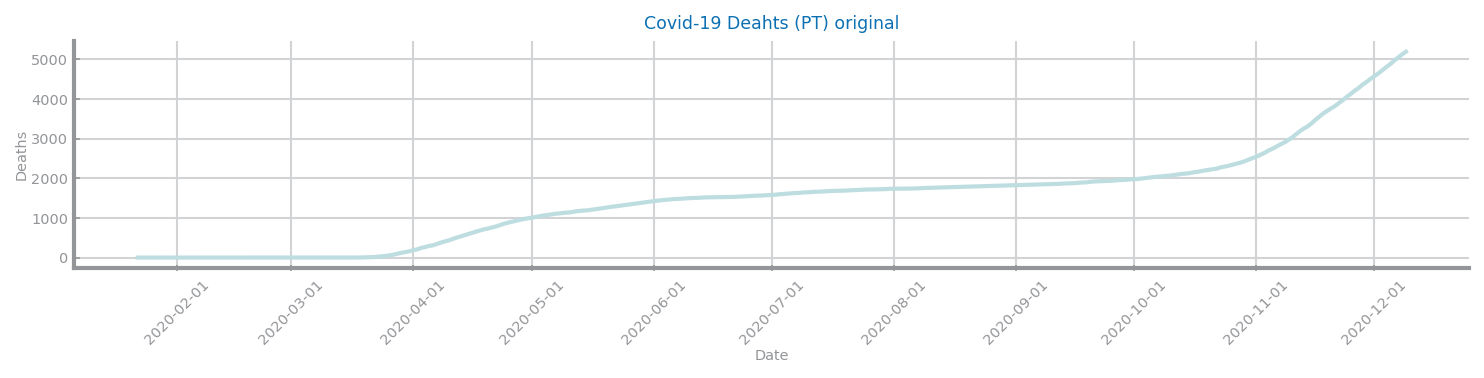

In [72]:
data = pd.read_csv('covid19_pt.csv', index_col='Date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = data.sort_values(by=["Date"]) #Dates weren't sorted

x_label='Date'
y_label='Deaths'
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(data, x_label=x_label, y_label=y_label, title='Covid-19 Deahts (PT) original')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x300 with 0 Axes>

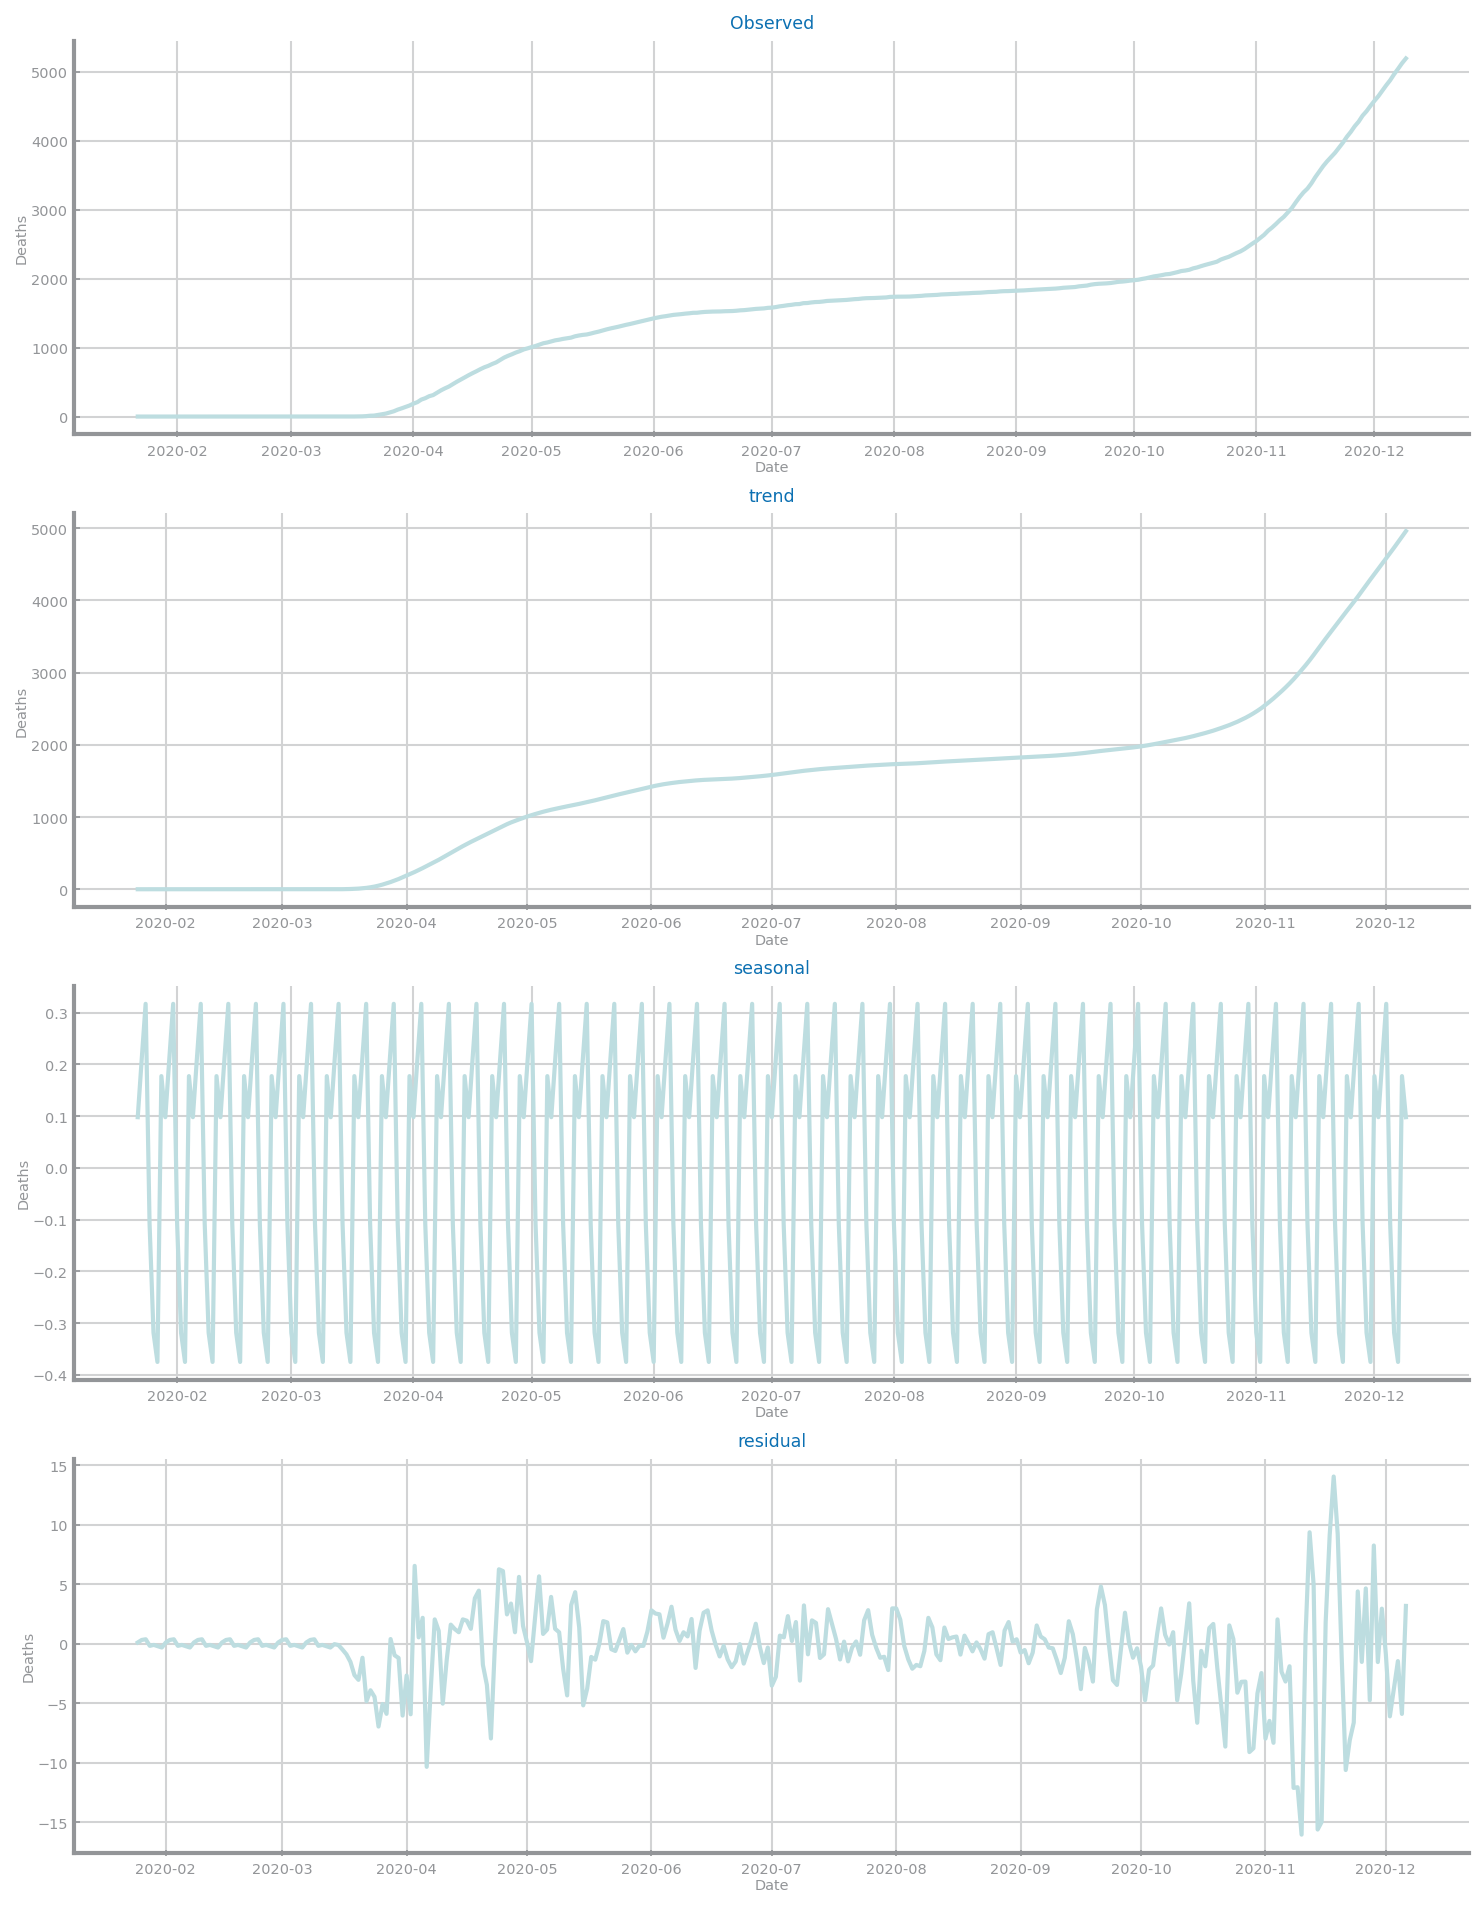

In [73]:
FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'time', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])

decomposition = seasonal.seasonal_decompose(data, model = "add")
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data, decomposition, x_label='Date', y_label='Deaths')
plt.show()

### ARIMA

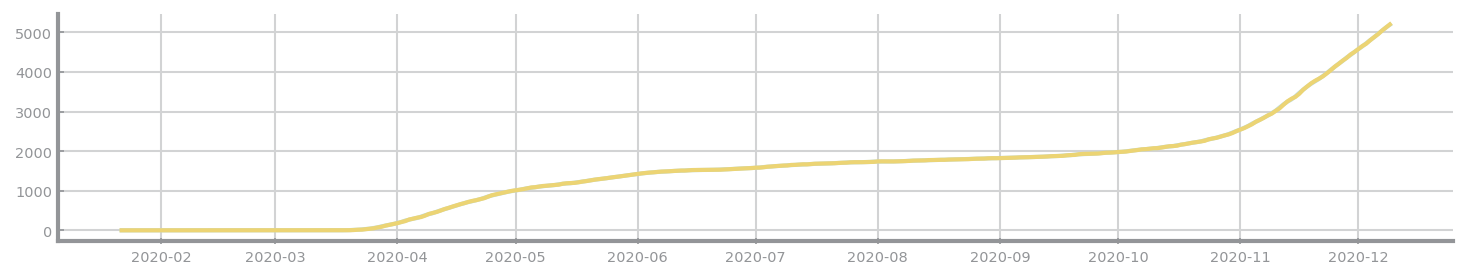

In [74]:
index = data.index.to_period('D')
df = data.copy().groupby(index).mean()
df['Date'] = index.drop_duplicates().to_timestamp()
df.set_index('Date', drop=True, inplace=True)

model = ARIMA(df, order=(2,1,2))
results = model.fit()
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(df)
plt.plot(results.fittedvalues)
plt.show()

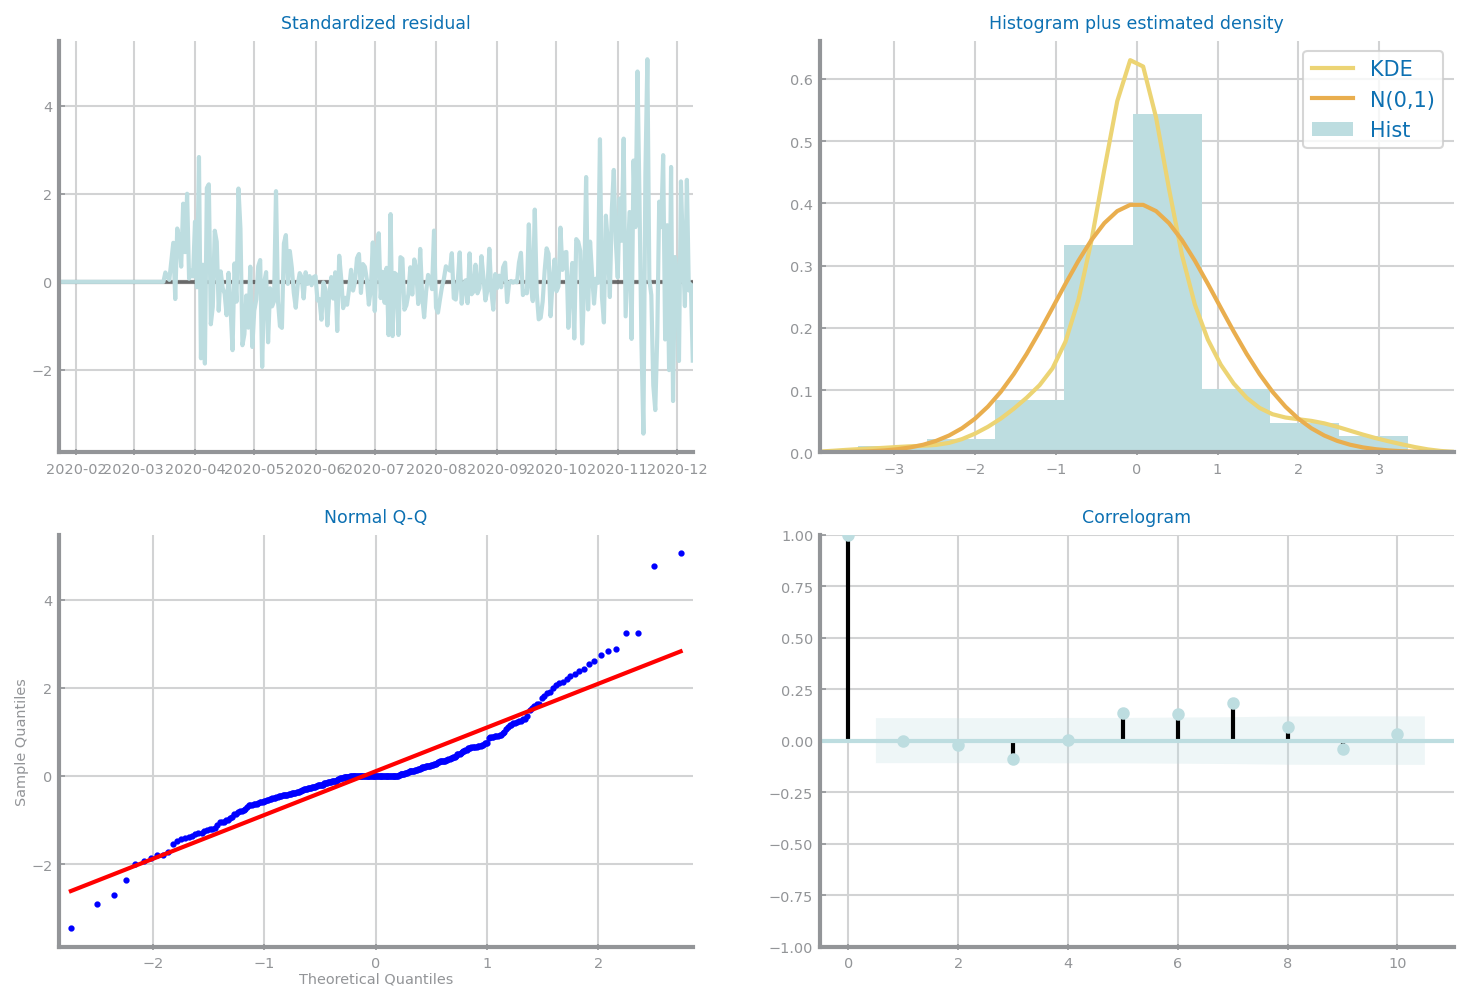

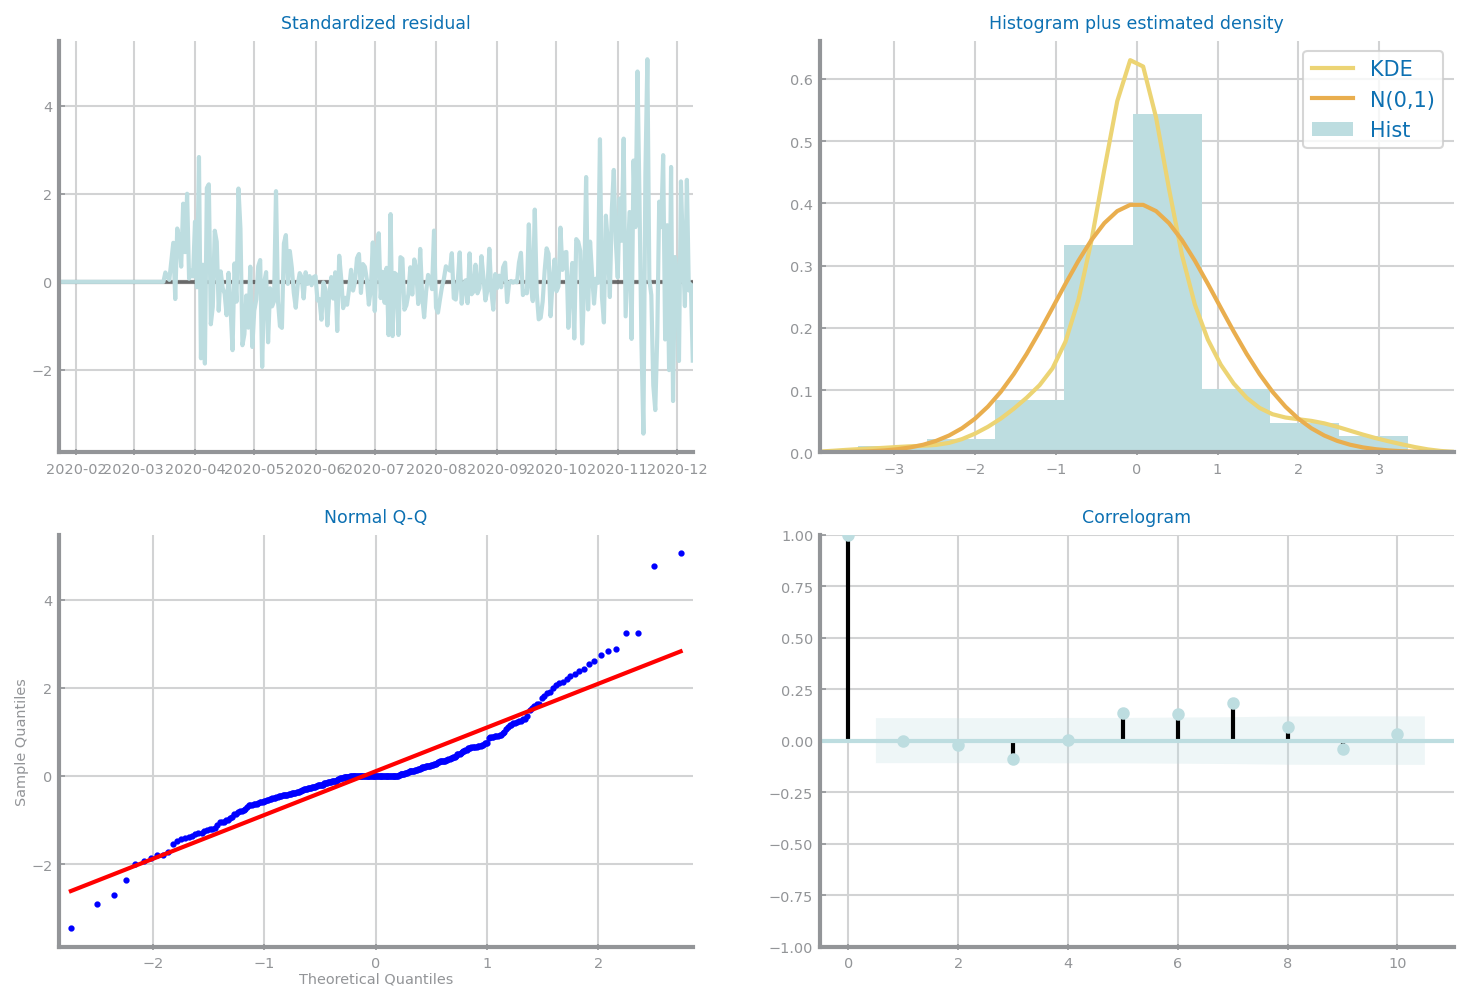

In [75]:
results.plot_diagnostics(figsize=(FIG_WIDTH, 4*FIG_HEIGHT))

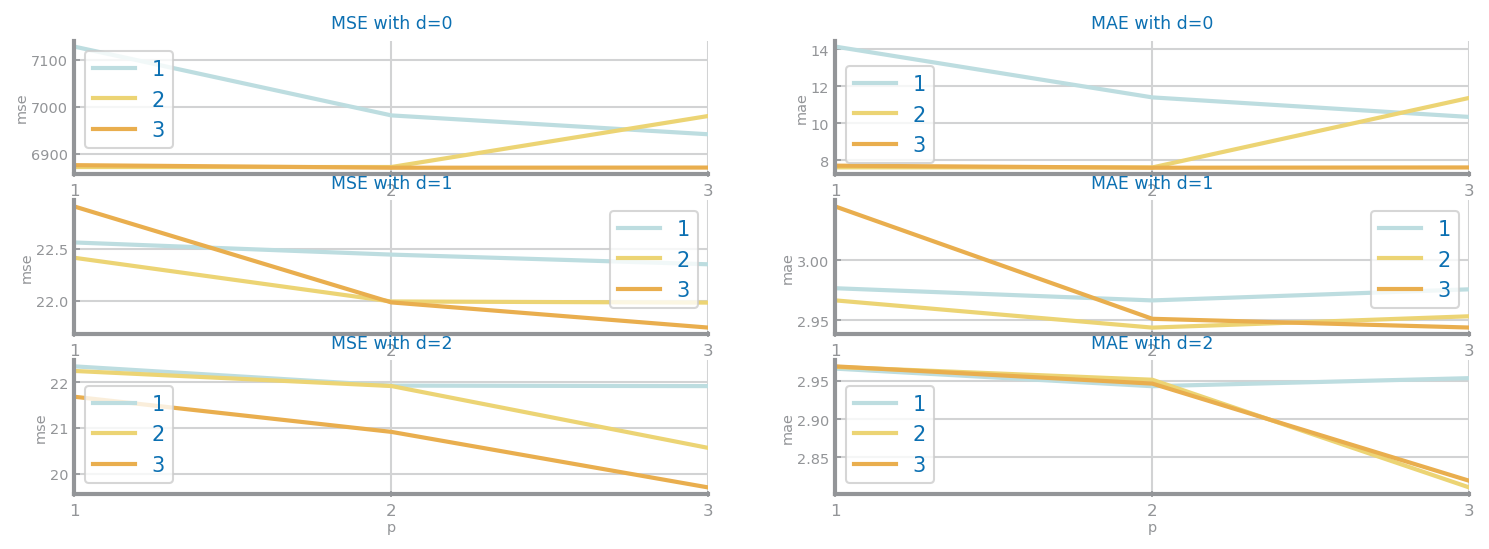

In [76]:
_, axs = plt.subplots(3, 2, figsize=(FIG_WIDTH, 2*FIG_HEIGHT))
params = (1, 2, 3)
for d in (0, 1, 2):
    mse = {}
    mae = {}
    for p in params:
        mse_lst = []
        mae_lst = []
        for q in params:
            mod = ARIMA(df, order=(p, d, q))
            results = mod.fit()
            mse_lst.append(results.mse)
            mae_lst.append(results.mae)
        mse[p] = mse_lst
        mae[p] = mae_lst
    ds.multiple_line_chart(params, mse, ax=axs[d, 0], title=f'MSE with d={d}', xlabel='p', ylabel='mse')
    ds.multiple_line_chart(params, mae, ax=axs[d, 1], title=f'MAE with d={d}', xlabel='p', ylabel='mae')
plt.show()

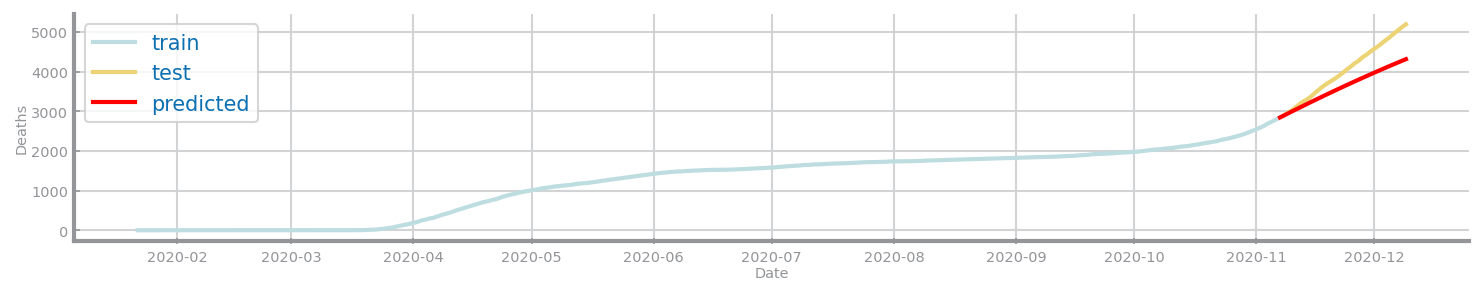

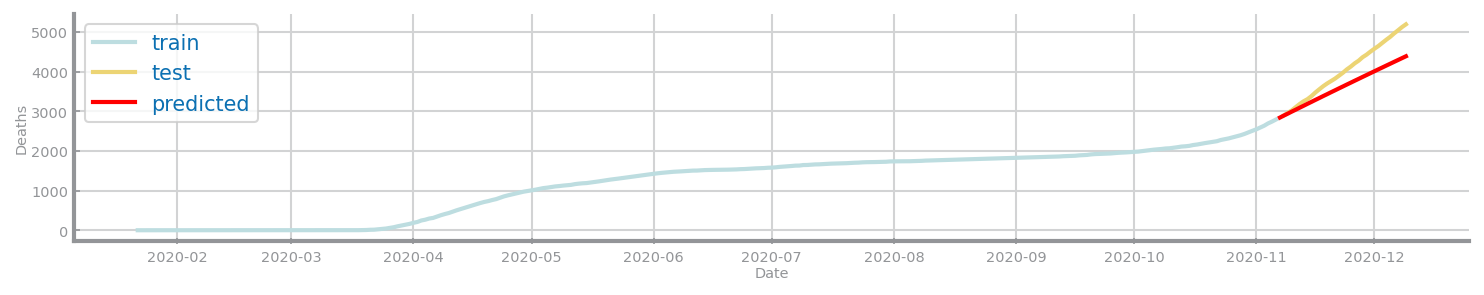

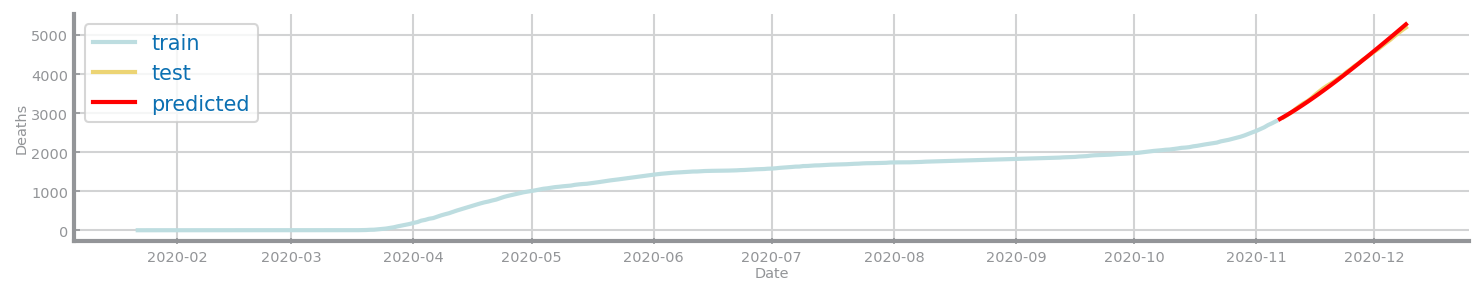

In [77]:
def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

p, d, q = 2, 0, 2
n = len(df)
train = df[:n*9//10]
test = df[n*9//10+1:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(df)-1)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

p, d, q = 2, 1, 2
n = len(df)
train = df[:n*9//10]
test = df[n*9//10+1:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(df)-1)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

p, d, q = 2, 2, 2
n = len(df)
train = df[:n*9//10]
test = df[n*9//10+1:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(df)-1)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


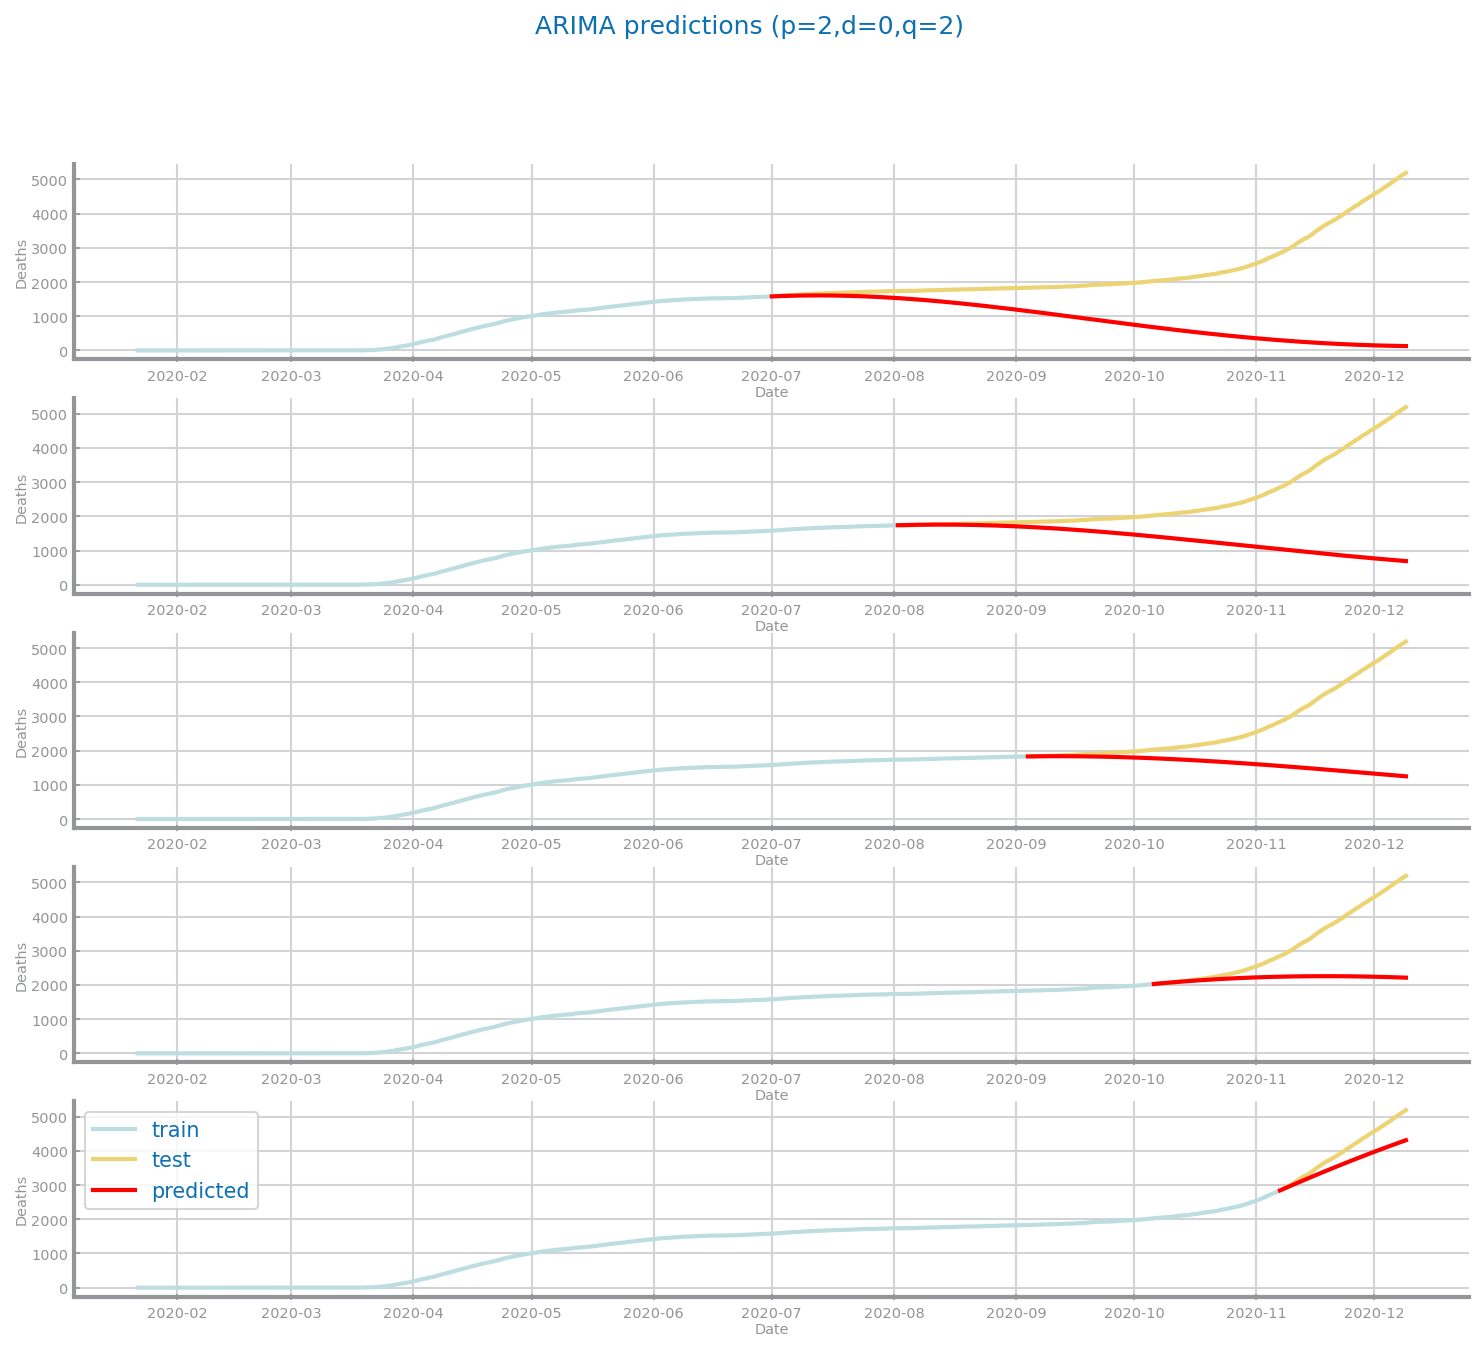

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


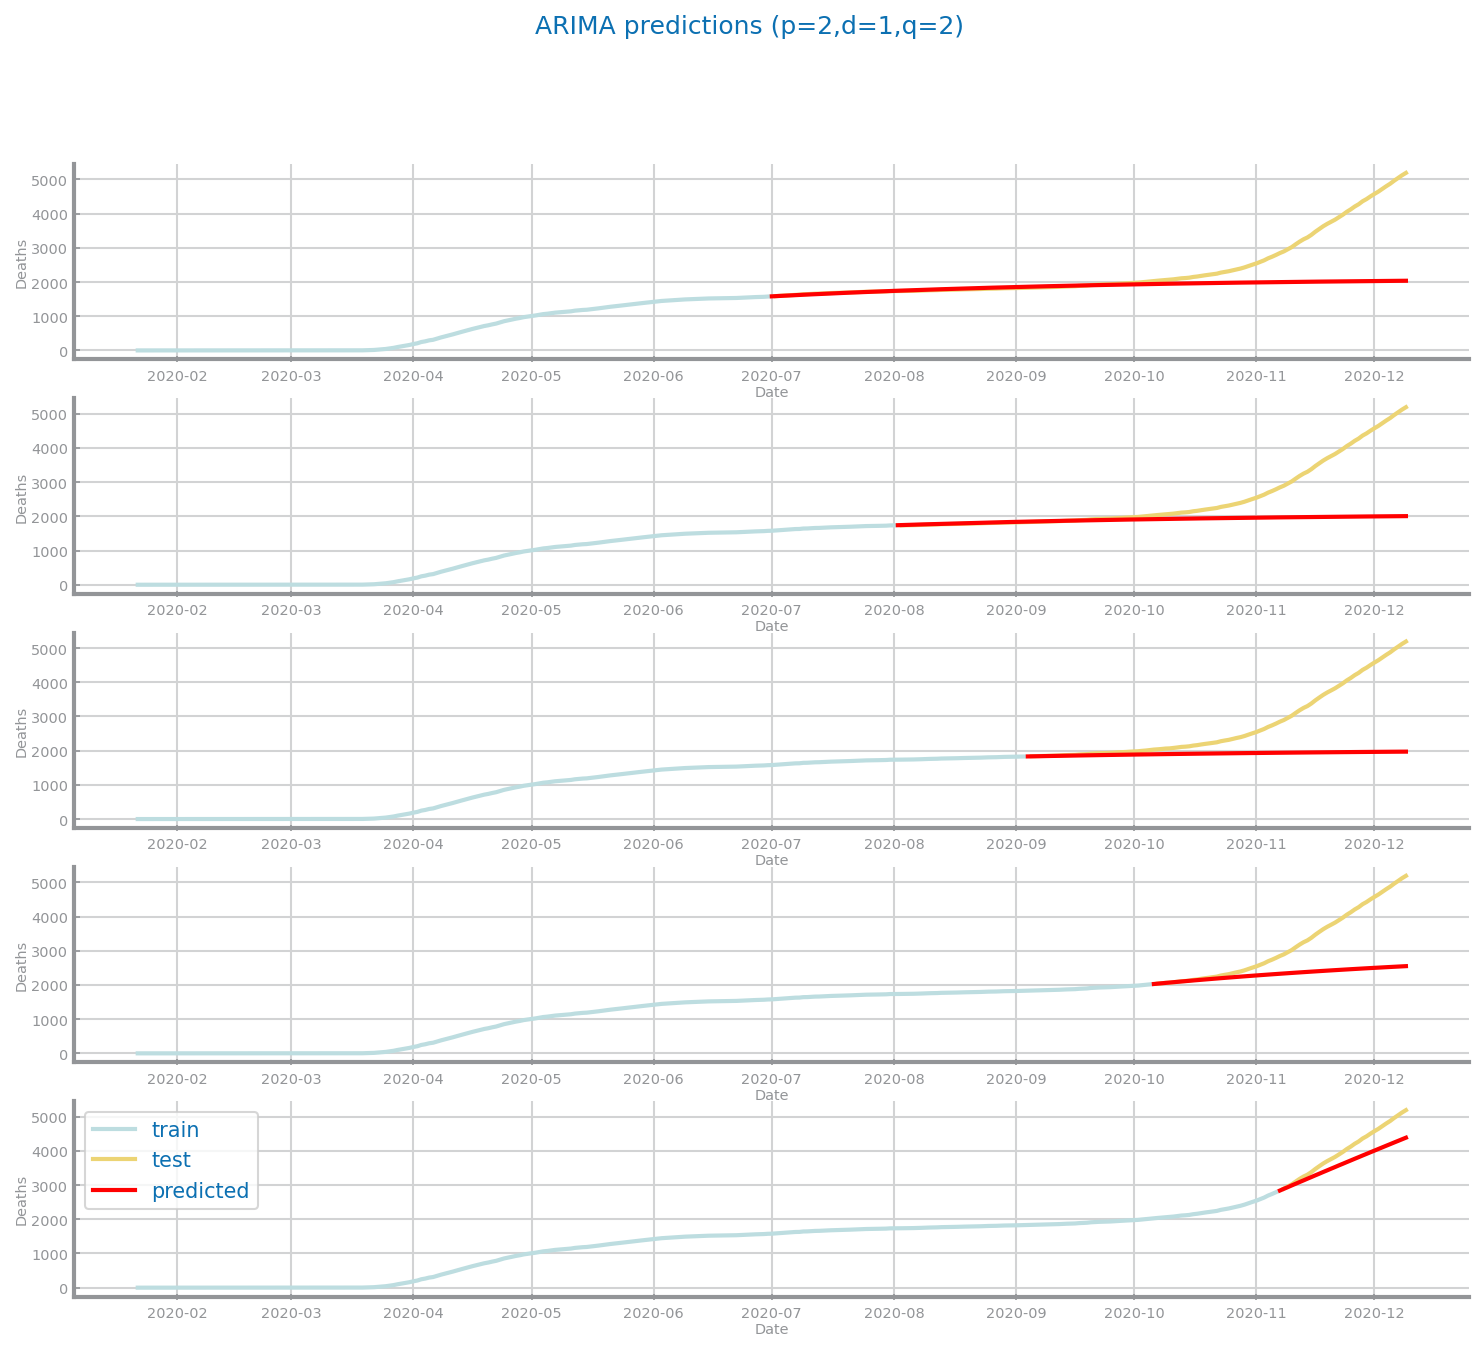

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


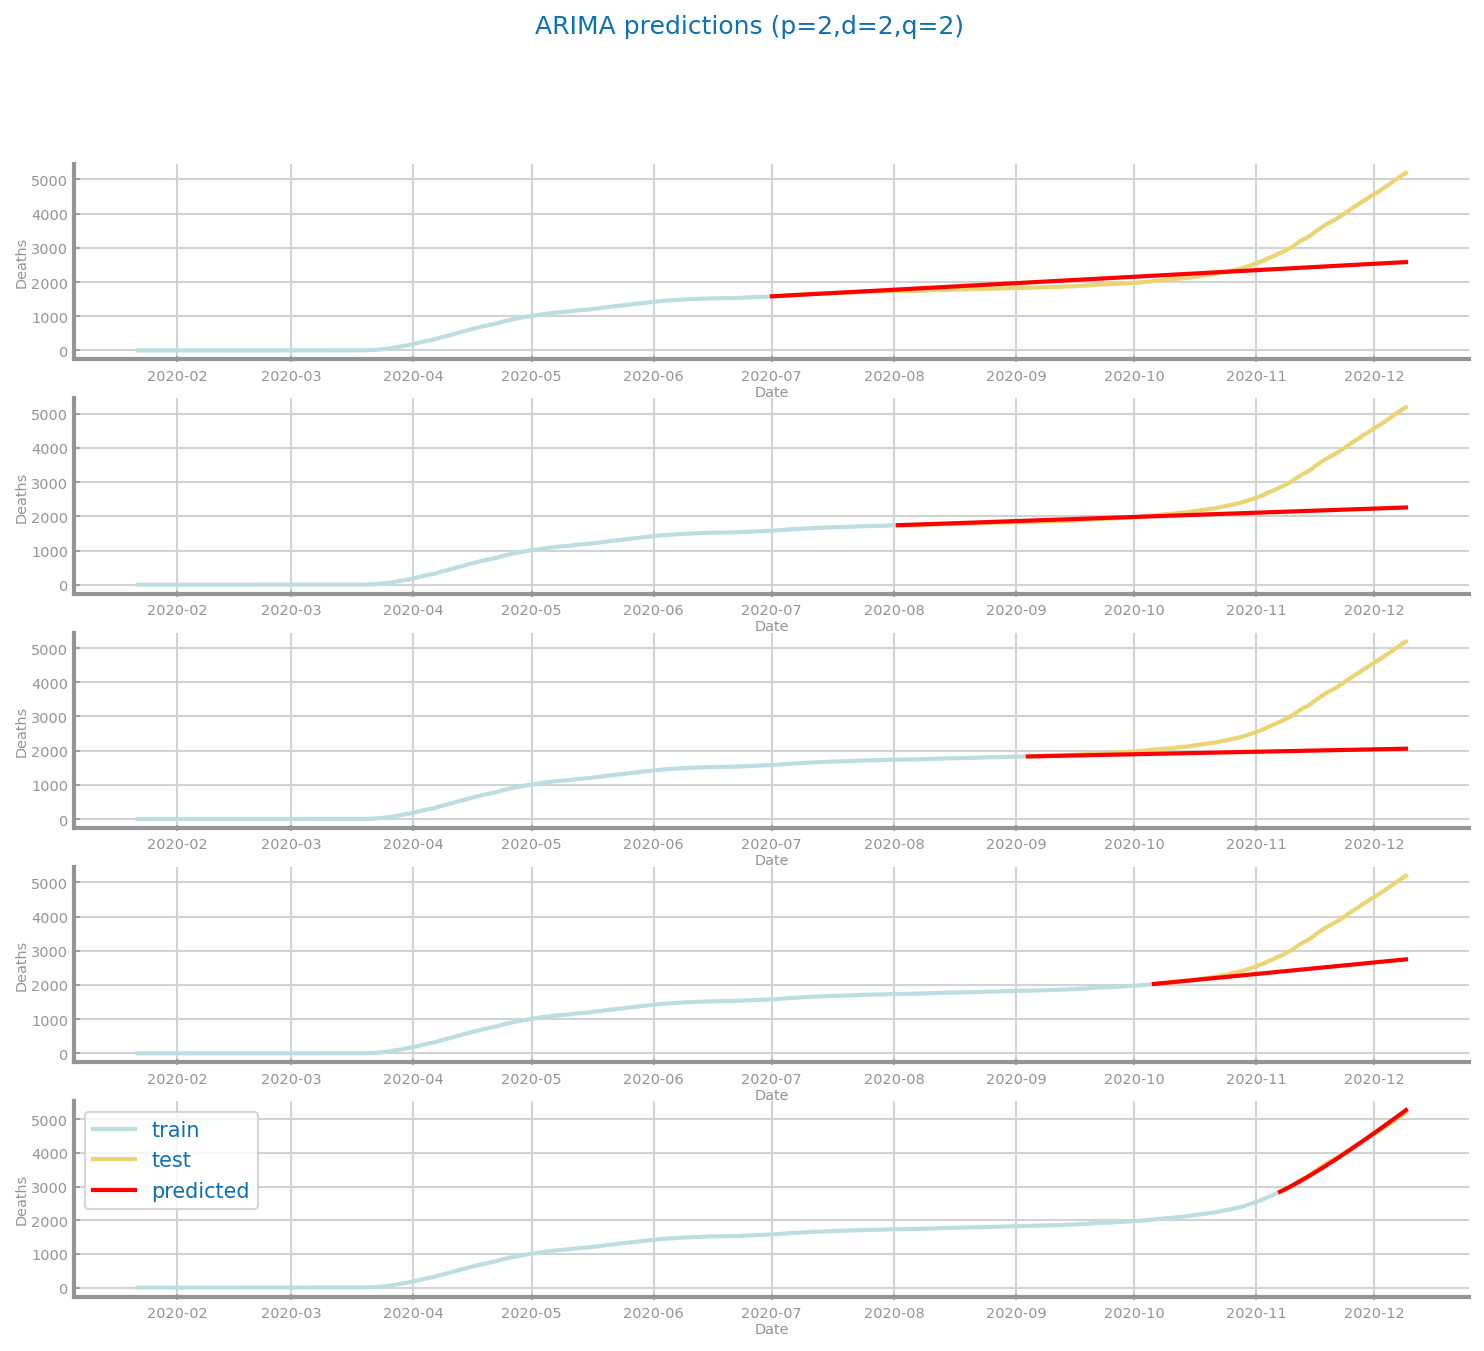

In [78]:
p, d, q = 2, 0, 2

fig, axs = plt.subplots(5, 1, figsize=(FIG_WIDTH, 5*FIG_HEIGHT))
fig.suptitle(f'ARIMA predictions (p={p},d={d},q={q})')
k = 0
for i in range(50, 100, 10):
    train = df[:n*i//100]
    test = df[n*i//100+1:]

    mod = ARIMA(train, order=(p, d, q))
    mod = mod.fit()
    pred = mod.predict(start = len(train), end = len(df)-1)
    plot_forecasting(train, test, pred, ax=axs[k], x_label=x_label, y_label=y_label)
    k += 1
plt.show()

p, d, q = 2, 1, 2
fig, axs = plt.subplots(5, 1, figsize=(FIG_WIDTH, 5*FIG_HEIGHT))
fig.suptitle(f'ARIMA predictions (p={p},d={d},q={q})')
k = 0
for i in range(50, 100, 10):
    train = df[:n*i//100]
    test = df[n*i//100+1:]

    mod = ARIMA(train, order=(p, d, q))
    mod = mod.fit()
    pred = mod.predict(start = len(train), end = len(df)-1)
    plot_forecasting(train, test, pred, ax=axs[k], x_label=x_label, y_label=y_label)
    k += 1
plt.show()

p, d, q = 2, 2, 2
fig, axs = plt.subplots(5, 1, figsize=(FIG_WIDTH, 5*FIG_HEIGHT))
fig.suptitle(f'ARIMA predictions (p={p},d={d},q={q})')
k = 0
for i in range(50, 100, 10):
    train = df[:n*i//100]
    test = df[n*i//100+1:]

    mod = ARIMA(train, order=(p, d, q))
    mod = mod.fit()
    pred = mod.predict(start = len(train), end = len(df)-1)
    plot_forecasting(train, test, pred, ax=axs[k], x_label=x_label, y_label=y_label)
    k += 1
plt.show()

## deaths_pt.csv
Weekly death reports from 2015 to 2020

### Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts
import ds_functions as ds
import statsmodels.tsa.seasonal as seasonal
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

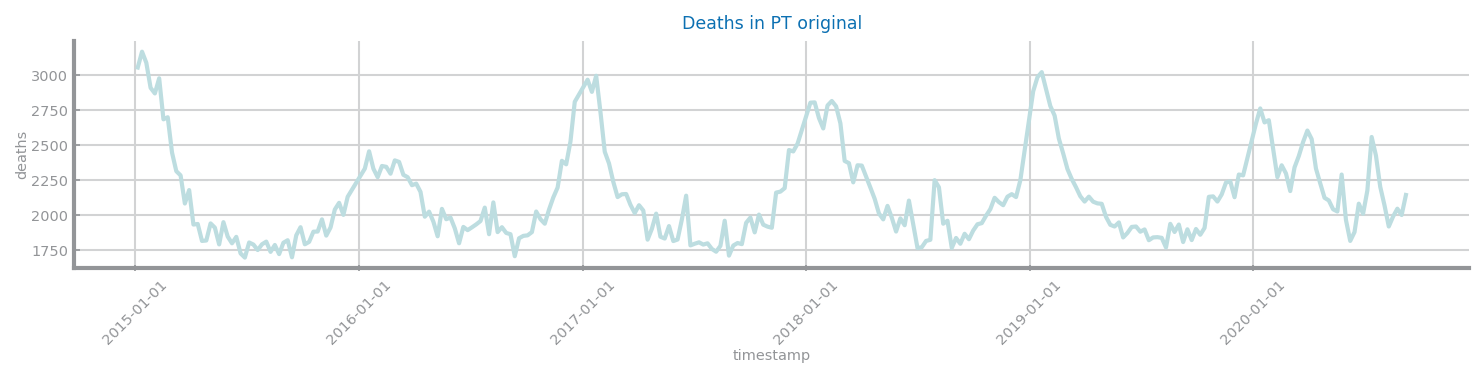

In [7]:
data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = data.sort_values(by=["start_date"]) #Dates weren't sorted

x_label='timestamp'
y_label='deaths'
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(data, x_label=x_label, y_label=y_label, title='Deaths in PT original')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x300 with 0 Axes>

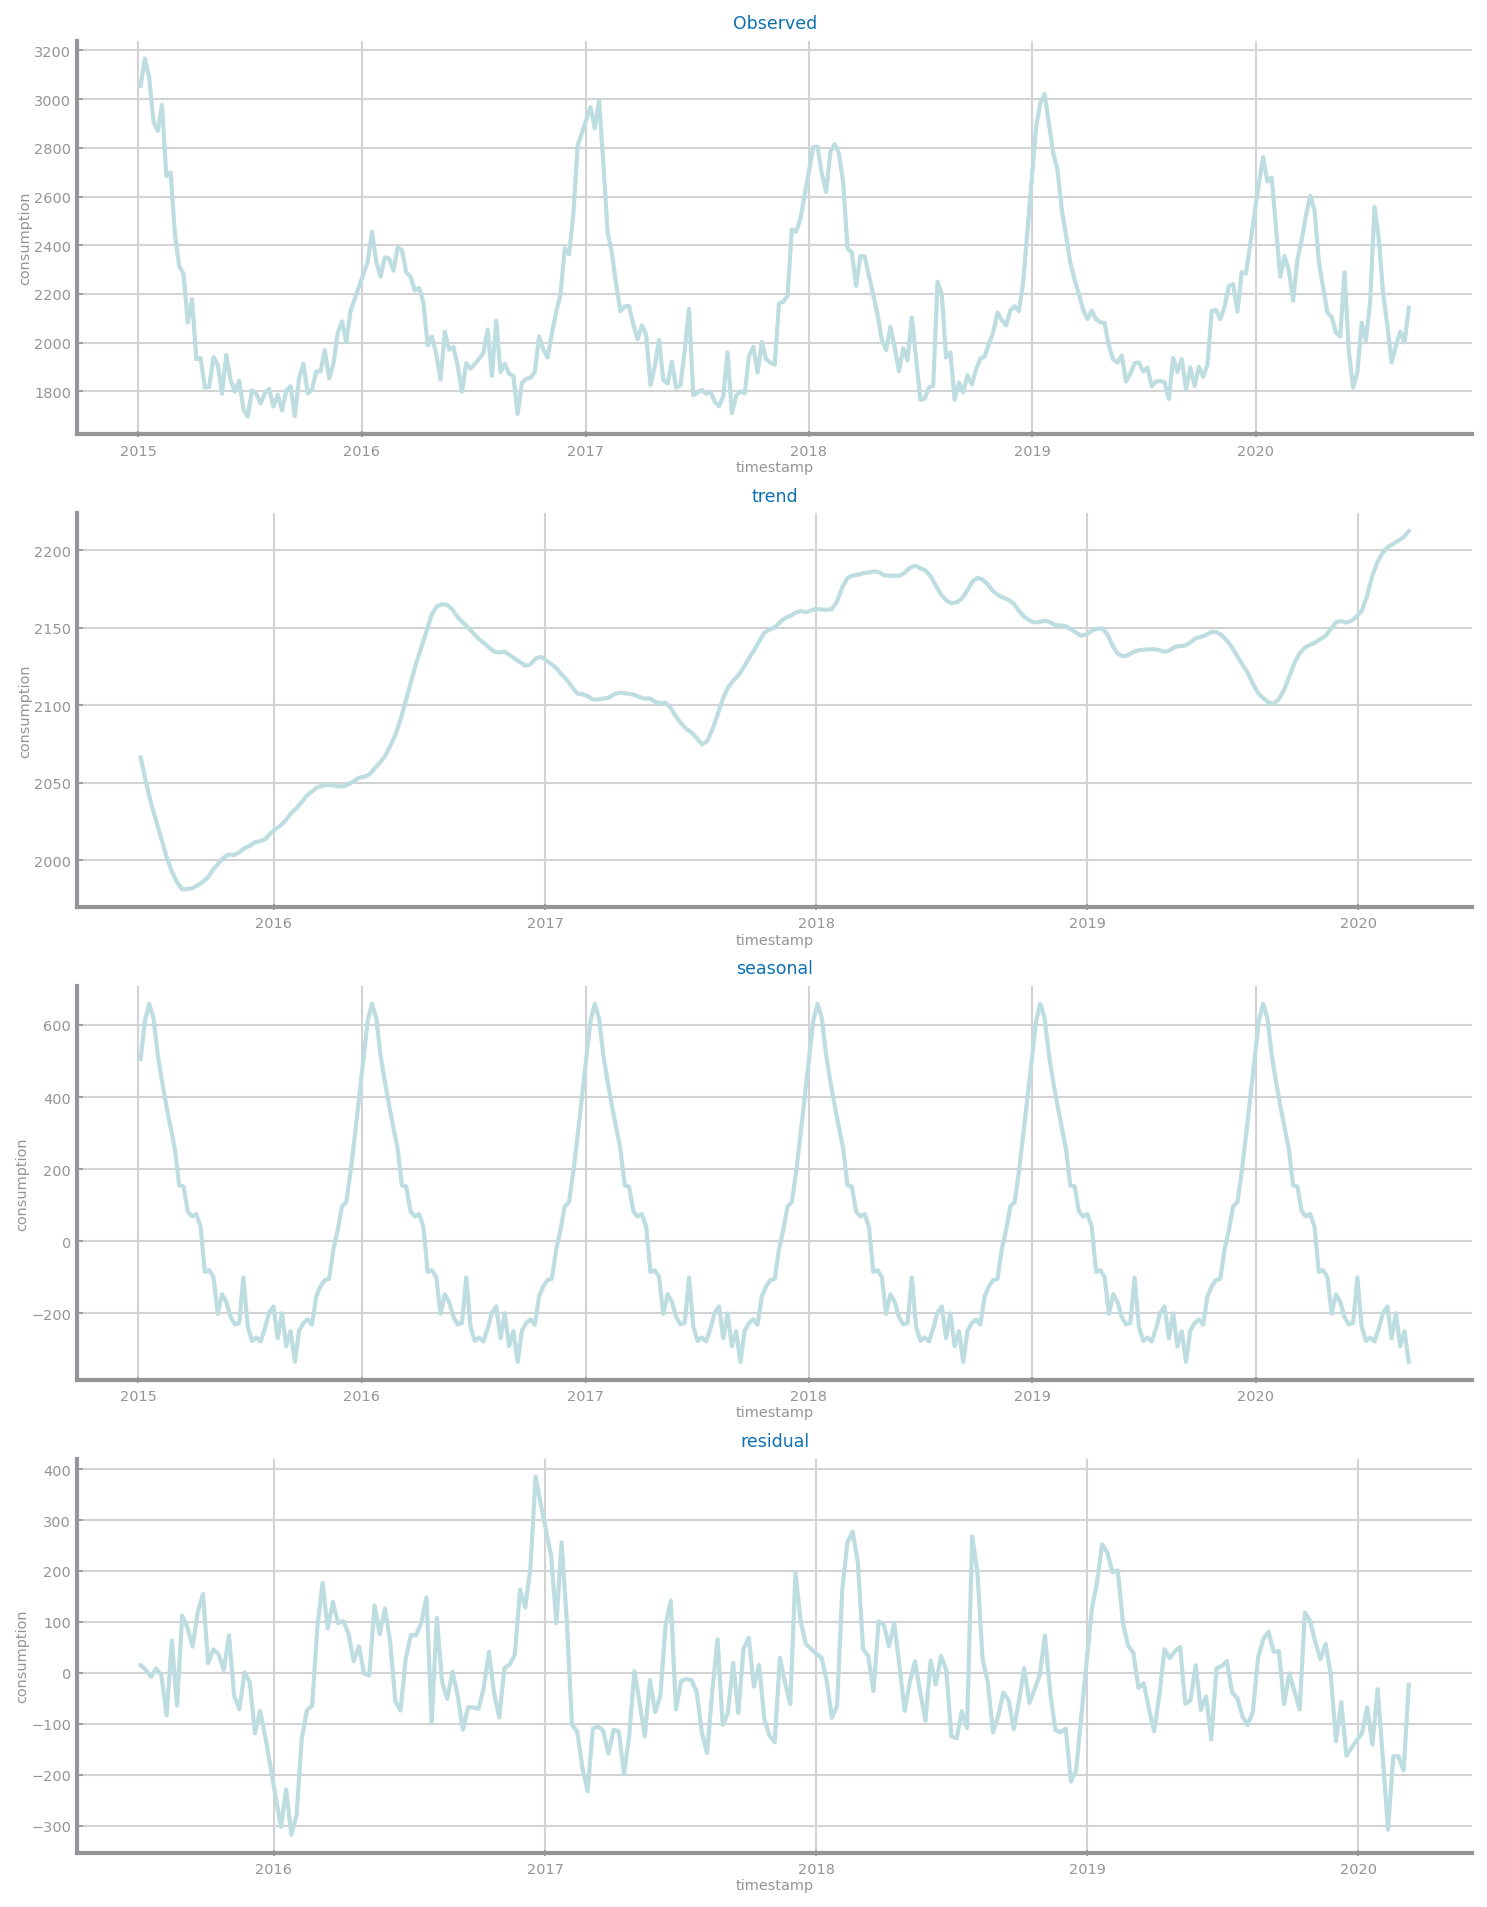

In [8]:
data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = data.sort_values(by=["start_date"]) #Dates weren't sorted

import statsmodels.tsa.seasonal as seasonal

FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'time', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])

data = data.asfreq("w-mon")
data = data.interpolate()

decomposition = seasonal.seasonal_decompose(data, model = "add")
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data, decomposition, x_label='timestamp', y_label='consumption')
plt.show()

### ARIMA

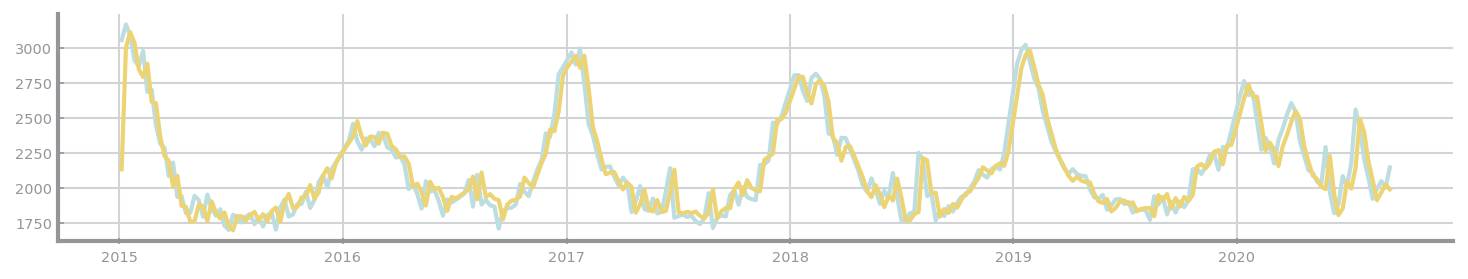

In [10]:
data = pd.read_csv('deaths_pt.csv', index_col='start_date',
                   parse_dates=True, infer_datetime_format=True)
data = data.sort_values(by=["start_date"]) #Dates weren't sorted

data = data.asfreq("w-mon")
data = data.interpolate()

model = ARIMA(data, order=(2,0,2))
results = model.fit()
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(data)
plt.plot(results.fittedvalues)
plt.show()

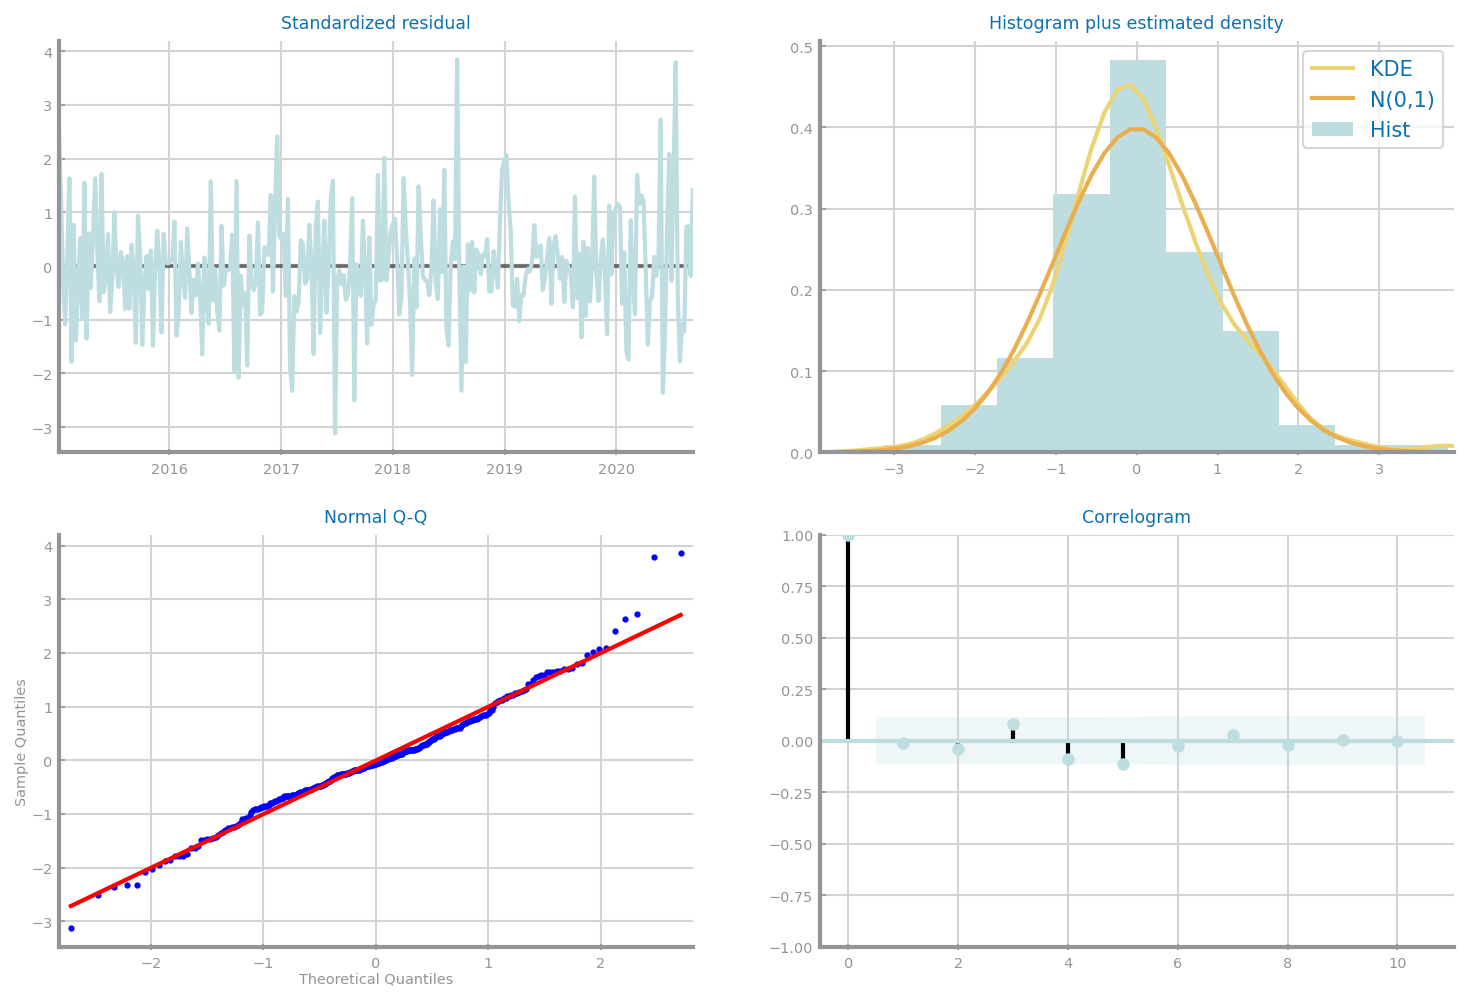

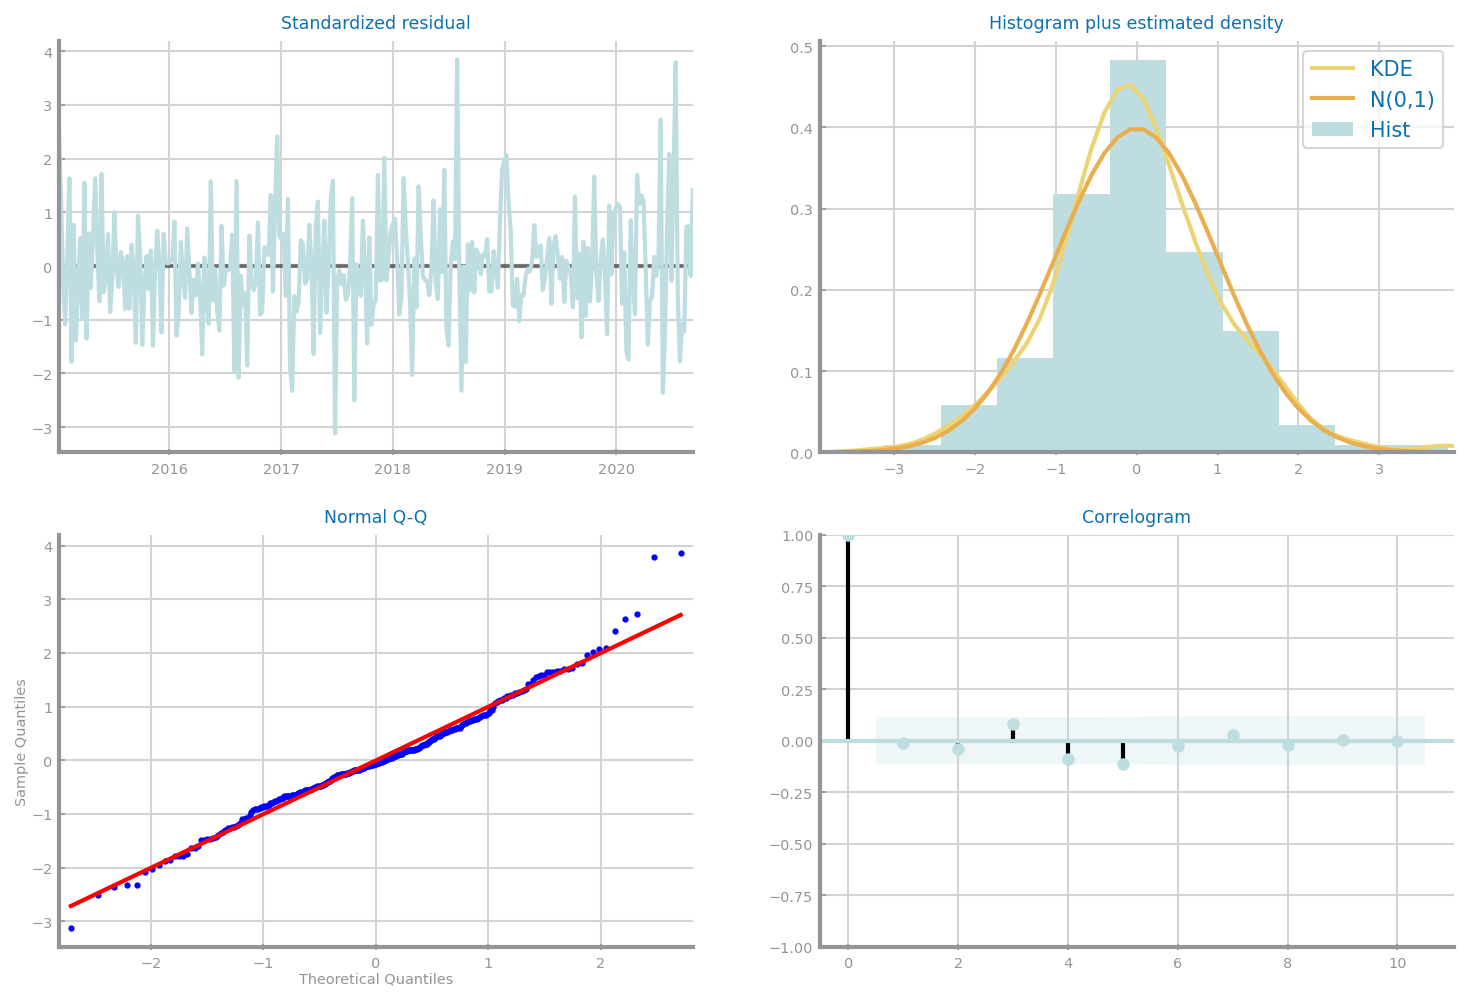

In [11]:
results.plot_diagnostics(figsize=(FIG_WIDTH, 4*FIG_HEIGHT))

### Parameter Picking

0
1
2


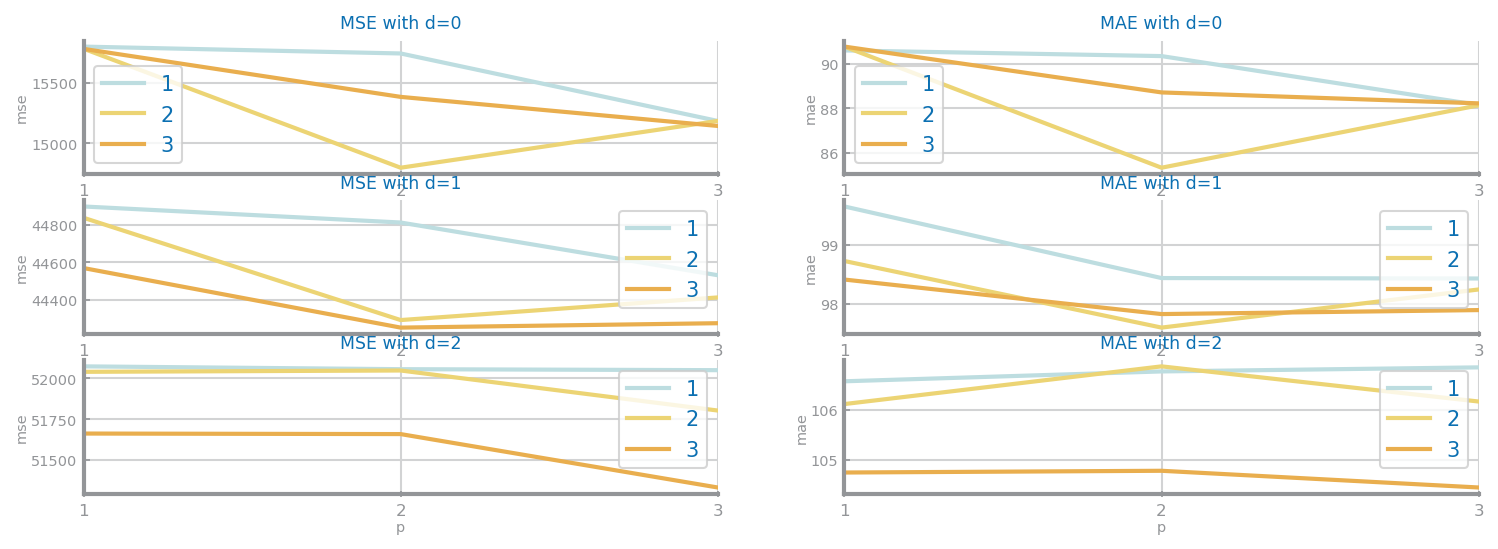

In [12]:
_, axs = plt.subplots(3, 2, figsize=(FIG_WIDTH, 2*FIG_HEIGHT))
params = (1, 2, 3)
for d in (0, 1,2):
    print(d)
    mse = {}
    mae = {}
    for p in params:
        mse_lst = []
        mae_lst = []
        for q in params:
            mod = ARIMA(data, order=(p, d, q))
            results = mod.fit()
            mse_lst.append(results.mse)
            mae_lst.append(results.mae)
        mse[p] = mse_lst
        mae[p] = mae_lst
    ds.multiple_line_chart(params, mse, ax=axs[d, 0], title=f'MSE with d={d}', xlabel='p', ylabel='mse')
    ds.multiple_line_chart(params, mae, ax=axs[d, 1], title=f'MAE with d={d}', xlabel='p', ylabel='mae')
plt.show()

In [13]:
d=0
p=2
q=2

### Predict weekly deaths for 2019

                               SARIMAX Results                                
Dep. Variable:                 deaths   No. Observations:                  209
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1277.035
Date:                Fri, 18 Dec 2020   AIC                           2566.071
Time:                        21:01:08   BIC                           2586.125
Sample:                    01-05-2015   HQIC                          2574.179
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2117.5060     20.881    101.409      0.000    2076.580    2158.432
ar.L1          1.9615      0.011    182.920      0.000       1.941       1.983
ar.L2         -0.9754      0.010    -93.833      0.0

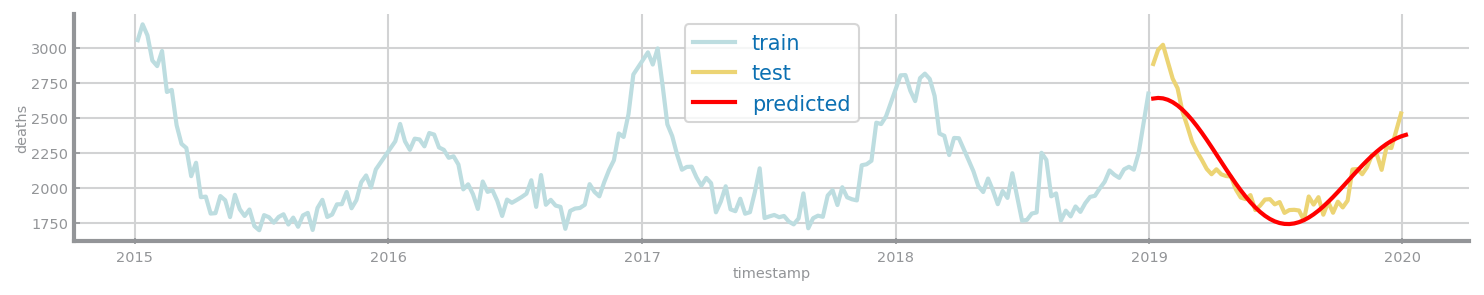

In [23]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from statsmodels.tools.eval_measures import rmse

def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

data = pd.read_csv('deaths_pt.csv', index_col='start_date',
                   parse_dates=True, infer_datetime_format=True)
data = data.sort_values(by=["start_date"]) #Dates weren't sorted

data = data.asfreq("w-mon")
data = data.interpolate()

df = data
n = len(df)
train = df.loc[:'2019-01-01']
test = df['2019-01-01':'2020-01-01']

mod = ARIMA(train, order=(2, 0, 2))
mod = mod.fit()
print(mod.summary())

pred = mod.predict(start = len(train), end = '2020-01-01')

print("MSE:",mod.mse)
print("MAE:",mod.mae)
rmse = rmse(test, pred)
print(rmse)
print("RMSE:",sum(rmse)/len(rmse))

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

### Predict weekly deaths for 2020

                               SARIMAX Results                                
Dep. Variable:                 deaths   No. Observations:                  261
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1582.279
Date:                Fri, 18 Dec 2020   AIC                           3176.558
Time:                        21:00:55   BIC                           3197.945
Sample:                    01-05-2015   HQIC                          3185.155
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2122.4863     17.840    118.970      0.000    2087.520    2157.453
ar.L1          1.9570      0.010    186.618      0.000       1.936       1.978
ar.L2         -0.9713      0.010    -94.633      0.0

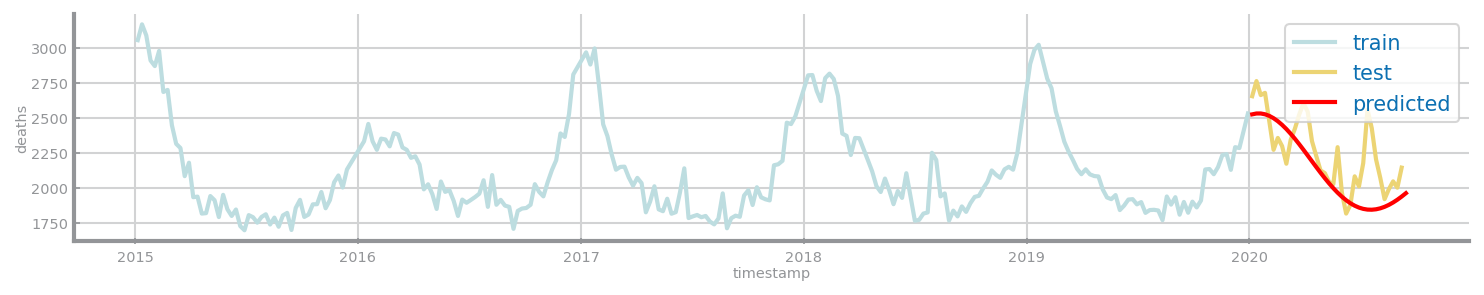

In [22]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from statsmodels.tools.eval_measures import rmse


def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

data = pd.read_csv('deaths_pt.csv', index_col='start_date',
                   parse_dates=True, infer_datetime_format=True)
data = data.sort_values(by=["start_date"]) #Dates weren't sorted

data = data.asfreq("w-mon")
data = data.interpolate()

df = data    
n = len(df)
train = df.loc[:'2020-01-01']
test = df['2020-01-01':]

mod = ARIMA(train, order=(2, 0, 2))
mod = mod.fit()
print(mod.summary())

pred = mod.predict(start = len(train), end = len(df))

print("MSE:",mod.mse)
print("MAE:",mod.mae)
rmse = rmse(test, pred)
print(rmse)
print("RMSE:",sum(rmse)/len(rmse))

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

### Predict 4 extra weeks of december 2020

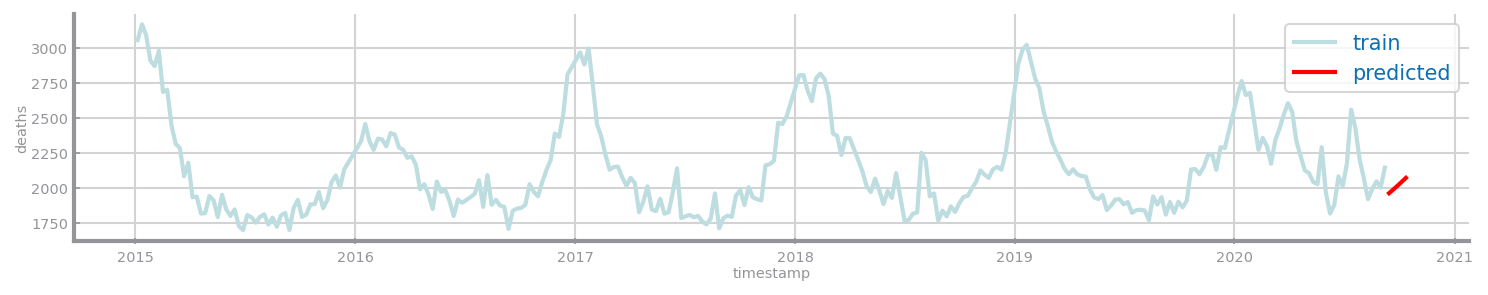

In [21]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

def plot_forecasting(train: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

data = pd.read_csv('deaths_pt.csv', index_col='start_date',
                   parse_dates=True, infer_datetime_format=True)
data = data.sort_values(by=["start_date"]) #Dates weren't sorted

data = data.asfreq("w-mon")
data = data.interpolate()

df = data
n = len(df)

pred = mod.predict(start = len(df), end = len(df)+4)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(df, pred, x_label=x_label, y_label=y_label)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                 deaths   No. Observations:                  297
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1819.902
Date:                Fri, 18 Dec 2020   AIC                           3651.803
Time:                        20:06:46   BIC                           3673.966
Sample:                    01-05-2015   HQIC                          3660.676
                         - 09-07-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2130.7183     16.860    126.380      0.000    2097.674    2163.762
ar.L1          1.9417      0.013    144.406      0.000       1.915       1.968
ar.L2         -0.9550      0.013    -74.010      0.0

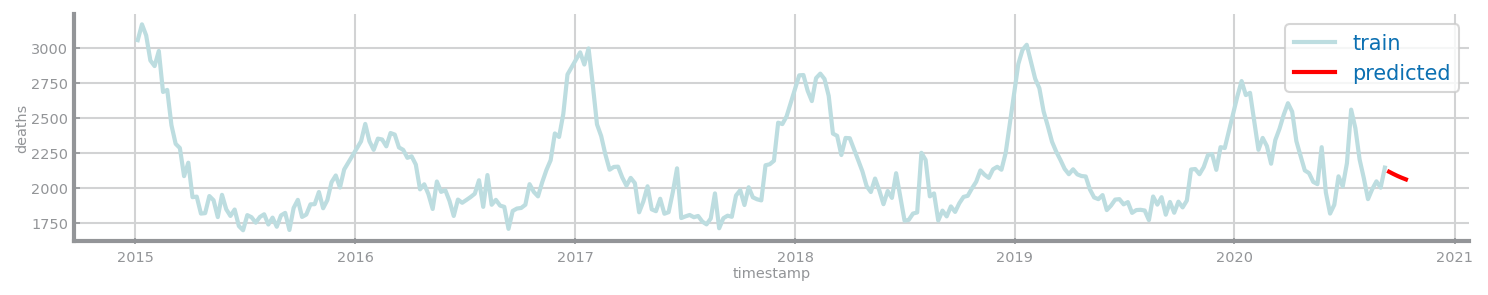

In [182]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

def plot_forecasting(train: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

    
    
n = len(df)
train = df.loc[:'2020-11-01']
test = df['2020-11-01':]

mod = ARIMA(train, order=(2, 0, 2))
mod = mod.fit()
print(mod.summary())

pred = mod.predict(start = len(df), end = len(df)+4)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(df, pred, x_label=x_label, y_label=y_label)
plt.show()